# Religion and tolerance

In [278]:
import numpy as np
import pandas as pd

In [279]:
gss = pd.read_excel('/Users/antoshachekhonte/Downloads/GSS.XLSX')

In [280]:
gss.head()

,YEAR,ID,WRKSTAT,HRS1,HRS2,EVWORK,WRKSLF,WRKGOVT,OCC10,PRESTG10,...,WTSSNR,WTSSALL,VSTRAT,VPSU,I_AGE,I_ATTEND,I_POLITICS,I_RACE,I_RELIGION,I_SEX
0,2016,1,1,50,-1,0,2,2,1020,60,...,1.260478,0.956994,3201,1,3.0,1.0,3.0,1,4.0,1
1,2016,2,1,42,-1,0,2,2,8030,40,...,0.630239,0.478497,3201,1,4.0,1.0,1.0,1,4.0,1
2,2016,3,5,-1,-1,1,2,2,7020,38,...,1.260478,0.956994,3201,1,4.0,6.0,5.0,1,2.0,1
3,2016,4,2,30,-1,0,2,2,4600,35,...,2.520956,1.913987,3201,1,2.0,5.0,3.0,1,2.0,2
4,2016,5,2,5,-1,0,2,2,4760,31,...,1.890717,1.435490,3201,1,3.0,1.0,2.0,1,4.0,2


## Subsetting relevant variables
Explanatory variables:
1. God - respondent's belief in God
2. Savesoul - whether respondent has encouraged somebody to believe in Jesus
3. Reppersn - level of religiosity
4. Attend - frequency of religious service attendance 
5. Fund - fundamentalism / liberalism of respondent's religion
6. Pray - prayer frequency
7. Polviews - political views
8. Sex
9. Educ
10. Sprel - spouse's religious preference
11. Spfund - fundamentalism of spouse
12. Bible - belief in bible

Target variables:
1. MARBLK - would you be in favor of having a close relation marry a black person
2. Homosex - permissibility of same-sex sexual relations 

In [281]:
gss_sub = gss[['GOD', 'SAVESOUL', 'RELPERSN', 'ATTEND', 'FUND', \
               'PRAY', 'POLVIEWS', 'SEX', 'EDUC', 'SPFUND', \
               'BIBLE', 'MARBLK', 'HOMOSEX', 'AGE']]

In [282]:
gss_sub.head()

,GOD,SAVESOUL,RELPERSN,ATTEND,FUND,PRAY,POLVIEWS,SEX,EDUC,SPFUND,BIBLE,MARBLK,HOMOSEX,AGE
0,2,2,4,0,3,6,4,1,16,3,3,3,4,47
1,8,2,4,0,3,6,2,1,12,0,3,1,0,61
2,6,2,1,7,2,1,6,1,16,2,1,0,4,72
3,6,2,2,6,2,3,4,2,12,2,2,3,4,43
4,1,2,4,0,3,6,3,2,18,3,3,0,4,55


In [283]:
gss_sub = gss_sub[(gss_sub['GOD'] != 8) & (gss_sub['GOD'] != 9)\
                  & (gss_sub['SAVESOUL'] != 8) & (gss_sub['SAVESOUL'] != 9)\
                  & (gss_sub['RELPERSN'] != 8) & (gss_sub['RELPERSN'] != 9)\
                  & (gss_sub['ATTEND'] != 8) & (gss_sub['ATTEND'] != 9)\
                  & (gss_sub['FUND'] != 9)\
                  & (gss_sub['PRAY'] != 8) & (gss_sub['PRAY'] != 9)\
                  & (gss_sub['POLVIEWS'] != 8) & (gss_sub['POLVIEWS'] != 9)\
                  & (gss_sub['EDUC'] != 98) & (gss_sub['PRAY'] != 99)\
                  & (gss_sub['SPFUND'] != 9) & (gss_sub['SPFUND'] != 0)\
                  & (gss_sub['BIBLE'] != 8) & (gss_sub['BIBLE'] != 9) & (gss_sub['BIBLE'] != 4)\
                  & (gss_sub['MARBLK'] != 8) & (gss_sub['MARBLK'] != 9)]

In [284]:
gss_sub.shape

(964, 14)

In [285]:
# reverse coding
gss_sub.loc[gss_sub['HOMOSEX'] == 1, 'HOMOSEX_RECODED'] = 4
gss_sub.loc[gss_sub['HOMOSEX'] == 2, 'HOMOSEX_RECODED'] = 3
gss_sub.loc[gss_sub['HOMOSEX'] == 3, 'HOMOSEX_RECODED'] = 2
gss_sub.loc[gss_sub['HOMOSEX'] == 4, 'HOMOSEX_RECODED'] = 1

In [286]:
# reverse coding
gss_sub.loc[gss_sub['SAVESOUL'] == 1, 'SAVESOUL_RECODED'] = 2
gss_sub.loc[gss_sub['SAVESOUL'] == 2, 'SAVESOUL_RECODED'] = 1

In [287]:
# reverse coding
gss_sub.loc[gss_sub['RELPERSN'] == 1, 'RELPERSN_RECODED'] = 4
gss_sub.loc[gss_sub['RELPERSN'] == 2, 'RELPERSN_RECODED'] = 3
gss_sub.loc[gss_sub['RELPERSN'] == 3, 'RELPERSN_RECODED'] = 2
gss_sub.loc[gss_sub['RELPERSN'] == 4, 'RELPERSN_RECODED'] = 1

In [288]:
# reverse coding
gss_sub.loc[gss_sub['FUND'] == 1, 'FUND_RECODED'] = 3
gss_sub.loc[gss_sub['FUND'] == 2, 'FUND_RECODED'] = 2
gss_sub.loc[gss_sub['FUND'] == 3, 'FUND_RECODED'] = 1

In [289]:
# reverse coding
gss_sub.loc[gss_sub['PRAY'] == 1, 'PRAY_RECODED'] = 6
gss_sub.loc[gss_sub['PRAY'] == 2, 'PRAY_RECODED'] = 5
gss_sub.loc[gss_sub['PRAY'] == 3, 'PRAY_RECODED'] = 4
gss_sub.loc[gss_sub['PRAY'] == 4, 'PRAY_RECODED'] = 3
gss_sub.loc[gss_sub['PRAY'] == 5, 'PRAY_RECODED'] = 2
gss_sub.loc[gss_sub['PRAY'] == 6, 'PRAY_RECODED'] = 1

In [290]:
# reverse coding
gss_sub.loc[gss_sub['SPFUND'] == 1, 'SPFUND_RECODED'] = 3
gss_sub.loc[gss_sub['SPFUND'] == 2, 'SPFUND_RECODED'] = 2
gss_sub.loc[gss_sub['SPFUND'] == 3, 'SPFUND_RECODED'] = 1

In [291]:
# reverse coding
gss_sub.loc[gss_sub['BIBLE'] == 1, 'BIBLE_RECODED'] = 3
gss_sub.loc[gss_sub['BIBLE'] == 2, 'BIBLE_RECODED'] = 2
gss_sub.loc[gss_sub['BIBLE'] == 3, 'BIBLE_RECODED'] = 1

In [292]:
# creating duplicate for safety
gss_sub_dup = gss_sub

## Hypothesis
There is a causal relationship between religiosity and tolerance. 

## Preliminary analysis
Let's start off by seeing how our explanatory variables correlate with the outcome variable.

In [293]:
# GOD

In [294]:
gss_sub.groupby('GOD').size()

GOD
1     30
2     69
3    104
4     34
5    175
6    552
dtype: int64

In [295]:
gss_sub[gss_sub['MARBLK'] != 0].groupby('GOD').MARBLK.mean()

GOD
1    2.888889
2    2.756098
3    2.535211
4    2.900000
5    2.862385
6    2.652174
Name: MARBLK, dtype: float64

In [296]:
gss_sub[gss_sub['HOMOSEX'] != 0].groupby('GOD').HOMOSEX_RECODED.mean()

GOD
1    1.619048
2    1.580000
3    1.333333
4    1.625000
5    1.752294
6    2.804408
Name: HOMOSEX_RECODED, dtype: float64

In [297]:
# RELPERSN

In [298]:
gss_sub.groupby('RELPERSN_RECODED').size()

RELPERSN_RECODED
1.0    190
2.0    210
3.0    407
4.0    157
dtype: int64

In [299]:
gss_sub[gss_sub['MARBLK'] != 0].groupby('RELPERSN_RECODED').MARBLK.mean()

RELPERSN_RECODED
1.0    2.569106
2.0    2.793893
3.0    2.735507
4.0    2.618557
Name: MARBLK, dtype: float64

In [300]:
gss_sub[gss_sub['HOMOSEX'] != 0].groupby('RELPERSN_RECODED').HOMOSEX_RECODED.mean()

RELPERSN_RECODED
1.0    1.433071
2.0    1.822222
3.0    2.590734
4.0    3.174312
Name: HOMOSEX_RECODED, dtype: float64

## Building the explanatory variable

I shall attempt to build a measure of religiosity using the variables: GOD, SAVESOUL, RELPERSN, ATTEND, FUND, PRAY, SPREL, SPFUND, BIBLE

In [301]:
explanatory_var = gss_sub[['GOD', 'SAVESOUL_RECODED', 'RELPERSN_RECODED', 'ATTEND', 'FUND_RECODED', \
                           'PRAY_RECODED', 'SPFUND_RECODED', 'BIBLE_RECODED']]

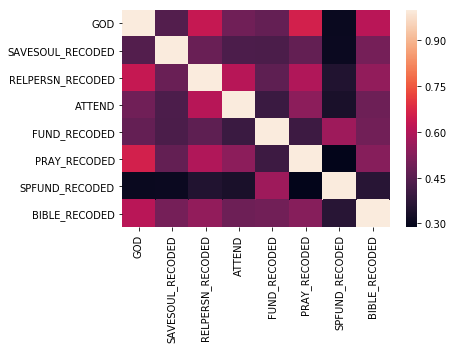

In [302]:
%matplotlib inline
import seaborn as sns
corr = explanatory_var.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [303]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components = 3, random_state = 0)
explanatory_var_transformed = transformer.fit_transform(explanatory_var)
explanatory_var_transformed.shape

(964, 3)

In [304]:
# what is the explained variance?
m = transformer.components_
n = transformer.noise_variance_
m1 = m**2
m2 = np.sum(m1, axis=1)
pvar1 = (100*m2[0])/np.sum(m2)
pvar2 = (100*m2[1])/np.sum(m2)
pvar3 = (100*m2[2])/np.sum(m2)
print('the variance explained by the first factor is', pvar1)
print('the variance explained by the second factor is', pvar2)
print('the variance explained by the third factor is', pvar3)

the variance explained by the first factor is 80.58588443437463
the variance explained by the second factor is 13.62823115983241
the variance explained by the third factor is 5.785884405792952


In [305]:
print('Total explained variance is', pvar1+pvar2+pvar3)

Total explained variance is 100.0


In [306]:
# adding this to the overall dataframe
gss_sub['FIRSTVAR'] = explanatory_var_transformed[:, 0]
gss_sub['SECONDVAR'] = explanatory_var_transformed[:, 1]
gss_sub['THIRDVAR'] = explanatory_var_transformed[:, 2]

In [307]:
transformer.components_[0, :]

array([-1.12396264, -0.29621073, -0.76127251, -2.13735438, -0.46616938,
       -1.28718258, -0.3578076 , -0.50899615])

In [308]:
import scipy.stats
scipy.stats.describe(explanatory_var_transformed[:, 0])

DescribeResult(nobs=964, minmax=(-1.5341857802485117, 2.044539414149542), mean=8.844930320665147e-17, variance=0.9292641506111441, skewness=0.3845519752369101, kurtosis=-0.8761730358797837)

The primary factor ranges from a min of -1.53 to a max of 2.04 with a variance of 0.92. 

Looking at the components above, we can see that all the input variables are negatively weighted. This means that the more negative the value of a given datapoint, the higher the religiosity.

## Analyzing the relationship between the variables of interest

Starting off by trying to study the (rough) effect of the primary factor obtained from above.

In [309]:
# Credit to volodymyr, stackexchange contributor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

def get_matching_pairs(treated_df, non_treated_df, scaler=True):
    treated_x = treated_df.values
    non_treated_x = non_treated_df.values
    if (scaler==True):
        scaler=StandardScaler()
    if (scaler):
        scaler.fit(treated_x)
        treated_x=scaler.transform(treated_x)
        non_treated_x=scaler.transform(non_treated_x)
    nbrs=NearestNeighbors(n_neighbors=1,algorithm='ball_tree').fit(non_treated_x)
    distances,indices=nbrs.kneighbors(treated_x)
    indices=indices.reshape(indices.shape[0])
    matched = indices
    return matched

Let's first define 'treated' and 'untreated' groups. Since we are primarily focusing on the primary factor from the factor analysis, let's look at the summary statistics of this variable.

In [310]:
scipy.stats.describe(explanatory_var_transformed[:, 0])

DescribeResult(nobs=964, minmax=(-1.5341857802485117, 2.044539414149542), mean=8.844930320665147e-17, variance=0.9292641506111441, skewness=0.3845519752369101, kurtosis=-0.8761730358797837)

Looking at the factor loadings in the previous section, we can Let's define the treated observations as those datapoints with the primary more negative than a standard deviation below the mean, and the rest as untreated observations.

In [311]:
mean = scipy.stats.describe(explanatory_var_transformed[:, 0]).mean
variance = scipy.stats.describe(explanatory_var_transformed[:, 0]).variance
stdev = variance ** (1/2)
cutoff = mean - stdev / 2

In [312]:
# subsetting the treated and the control group
treated = gss_sub[gss_sub.FIRSTVAR < cutoff]
untreated = gss_sub[gss_sub.FIRSTVAR >= cutoff]

In [313]:
treated_sub = treated[['GOD','SAVESOUL','RELPERSN','ATTEND','FUND','PRAY',\
               'POLVIEWS','SEX','EDUC','SPFUND','BIBLE',\
               'SAVESOUL_RECODED','RELPERSN_RECODED','FUND_RECODED',\
               'PRAY_RECODED','SPFUND_RECODED','BIBLE_RECODED', 'AGE']]
untreated_sub = untreated[['GOD','SAVESOUL','RELPERSN','ATTEND','FUND','PRAY',\
               'POLVIEWS','SEX','EDUC','SPFUND','BIBLE',\
               'SAVESOUL_RECODED','RELPERSN_RECODED','FUND_RECODED',\
               'PRAY_RECODED','SPFUND_RECODED','BIBLE_RECODED', 'AGE']]

In [314]:
treated_sub = treated[['POLVIEWS','SEX','EDUC', 'AGE']]
untreated_sub = untreated[['POLVIEWS','SEX','EDUC', 'AGE']]

In [315]:
matched_indices = get_matching_pairs(treated_sub, untreated_sub, scaler=False)

In [316]:
# permissibility of homosexuality

In [317]:
s = 0
for i in range(matched_indices.shape[0]):
    t = treated.iloc[i].HOMOSEX_RECODED
    c = untreated.iloc[matched_indices, :].iloc[i].HOMOSEX_RECODED
    if (np.isfinite(t) & np.isfinite(c)):
        s += t - c
estimated_ATE = s / matched_indices.shape[0]
estimated_ATE

0.4401114206128134

This estimate is probably still highly biased, because of other unmeasured confounding variables.

In [318]:
# permissibility of marriage w black person

In [319]:
s = 0
for i in range(matched_indices.shape[0]):
    t = treated.iloc[i].MARBLK
    c = untreated.iloc[matched_indices, :].iloc[i].MARBLK
    if (np.isfinite(t) & np.isfinite(c)):
        s += t - c
estimated_ATE = s / matched_indices.shape[0]
estimated_ATE

-0.019498607242339833

This estimate too is probably still highly biased, because of other unmeasured confounding variables.

## Rough